In [162]:
#############################################################################
#          __________                                                       #
#   __  __/ ____/ __ \__ __   This file is part of MicroGP4 v1.0 "Kiwi"     #
#  / / / / / __/ /_/ / // /   (!) by Giovanni Squillero and Alberto Tonda   #
# / /_/ / /_/ / ____/ // /_   https://github.com/squillero/microgp4         #
# \__  /\____/_/   /__  __/                                                 #
#   /_/ --MicroGP4-- /_/      "You don't need a big goal, be μ-ambitious!!" #
#                                                                           #
#############################################################################

In [163]:
%matplotlib inline

import sys
sys.path += ['..']

import os
os.environ['PYTHONWARNINGS'] = 'default'

In [164]:
import microgp as ugp4

In [190]:
import math, random
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns

In the following, we use stats.rv_discrete to generate a discrete distribution that has the probabilities of the truncated normal for the intervals centered around the integers.

In [191]:
npoints = 20   # number of integer support points of the distribution minus 1
npointsh = npoints // 2
npointsf = float(npoints)
nbound = 4   # bounds for the truncated normal
normbound = (1+1/npointsf) * nbound   # actual bounds of truncated normal
grid = np.arange(-npointsh, npointsh+2, 1)   # integer grid
gridlimitsnorm = (grid-0.5) / npointsh * nbound   # bin limits for the truncnorm
gridlimits = grid - 0.5   # used later in the analysis
grid = grid[:-1]
probs = np.diff(stats.truncnorm.cdf(gridlimitsnorm, -normbound, normbound))
gridint = grid

In [193]:
normdiscrete = stats.rv_discrete(values=(gridint, np.round(probs, decimals=7)),
                                 name='normdiscrete')

In [194]:
print('mean = %6.4f, variance = %6.4f, skew = %6.4f, kurtosis = %6.4f' % normdiscrete.stats(moments='mvsk'))

mean = -0.0000, variance = 6.3302, skew = 0.0000, kurtosis = -0.0076


In [195]:
nd_std = np.sqrt(normdiscrete.stats(moments='v'))

In [196]:
n_sample = 500
rvs = normdiscrete.rvs(size=n_sample)
f, l = np.histogram(rvs, bins=gridlimits)
sfreq = np.vstack([gridint, f, probs*n_sample]).T
print(sfreq)

[[-1.00000000e+01  1.00000000e+00  2.95019349e-02]
 [-9.00000000e+00  0.00000000e+00  1.32294142e-01]
 [-8.00000000e+00  0.00000000e+00  5.06497902e-01]
 [-7.00000000e+00  1.00000000e+00  1.65568919e+00]
 [-6.00000000e+00  5.00000000e+00  4.62125309e+00]
 [-5.00000000e+00  1.10000000e+01  1.10137298e+01]
 [-4.00000000e+00  2.30000000e+01  2.24137683e+01]
 [-3.00000000e+00  4.50000000e+01  3.89503370e+01]
 [-2.00000000e+00  5.50000000e+01  5.78004747e+01]
 [-1.00000000e+00  6.90000000e+01  7.32455414e+01]
 [ 0.00000000e+00  7.70000000e+01  7.92618251e+01]
 [ 1.00000000e+00  7.60000000e+01  7.32455414e+01]
 [ 2.00000000e+00  5.70000000e+01  5.78004747e+01]
 [ 3.00000000e+00  4.10000000e+01  3.89503370e+01]
 [ 4.00000000e+00  1.70000000e+01  2.24137683e+01]
 [ 5.00000000e+00  1.50000000e+01  1.10137298e+01]
 [ 6.00000000e+00  5.00000000e+00  4.62125309e+00]
 [ 7.00000000e+00  2.00000000e+00  1.65568919e+00]
 [ 8.00000000e+00  0.00000000e+00  5.06497902e-01]
 [ 9.00000000e+00  0.00000000e+

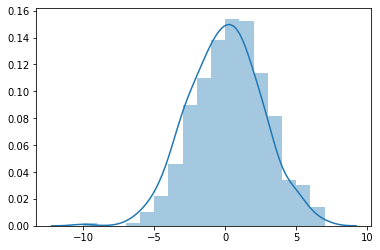

In [197]:
sns.distplot(rvs)